<a href="https://colab.research.google.com/github/bigirimanainnocent12/ANOVA/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Analyse de la variance √† un facteur***

# ***Introduction***

R√©mi est un philat√©liste passionn√©. Il collectionne particuli√®rement les timbres d'Allemagne,d'Autriche, de Belgique et de France. Il a l'impression qu'il a plus de mal √† d√©coller sans les ab√Æmer les timbres fran√ßais. Il pense que ces timbres sont peut-√™tre moins √©pais que les autres. Il s√©lectionne de mani√®re al√©atoire des timbres non ab√Æm√©s dans sa collection en se limitant aux 4 pays dont il a le plus de timbres. Il fait mesurer l'√©paisseur de ces timbres par une soci√©t√© √©quip√©e pour faire des mesures en microm√®tre. Il obtient le jeu de donn√©es timbres.csv. Calculez les statistiques descriptives puis faites le traitement statistique ad√©quat pour que R√©mi puisse d√©terminer si l'√©paisseur moyenne des timbres diff√®re selon les pays.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***importation de la base de donn√©es***

In [2]:
df=pd.read_csv('/content/timbres.csv',sep=';')
df.head()

Unnamed: 0  epaisseur      pays
0           1        263  Belgique
1           2        259  Belgique
2           3        246  Belgique
3           4        255  Belgique
4           5        260  Belgique

# ***Statistiques Descriptives***

In [3]:
df.groupby('pays')['epaisseur'].describe()

count        mean       std    min     25%    50%    75%    max
pays                                                                      
Allemagne   19.0  251.631579  6.048053  238.0  246.50  252.0  256.0  261.0
Autriche    25.0  251.840000  6.276145  242.0  246.00  252.0  258.0  265.0
Belgique    23.0  253.217391  6.828793  237.0  247.50  254.0  258.0  265.0
France      22.0  210.772727  8.518505  196.0  205.25  211.0  216.0  230.0

# ***Les hypoth√®ses du test et choix du test***


La question de R√©my est de savoir si l'√©paisseur moyenne des timbres diff√®re selon les pays. Nous allons utiliser un test param√©trique, tel que l'analyse de la variance (ANOVA), pour tenter de r√©pondre √† cette question.

Le mod√®le s'√©crit en g√©n√©ral:

 $Y_{ij}=\mu+\alpha_j+\epsilon_{ij}$ avec ‚àÄ j ‚àà {1,2,3,4}, $\{Y_{1j} $,...,
 $Y_{n_{j}j} \}$, les r√©ponses des observations pour lesquelles x = j et ‚àÄ i ‚àà {1,..,$n_{j}$}, $\mathbb{E}(\epsilon_{ij})=0$


***Les hypoth√®ses du test sont: ***

- $H_0$: Il n'y a pas de diff√©rence significative entre les
moyennes des √©paisseurs des timbres des diff√©rents pays.
- $H_1$ : Il y a au moins une moyenne des timbres
diff√©rente des autres moyennes des √©paisseurs des timbres des diff√©rents pays.








# ***Choix du seuil***

Le seuil de significativit√© ($\alpha$) est g√©n√©ralement fix√© √† 0,05. Cela signifie que si la p-valeur obtenue √† partir du test est inf√©rieure √† 0,05, nous pouvons rejeter l'hypoth√®se nulle et conclure qu'il existe une diff√©rence significative entre les moyennes des √©paisseurs des timbres des diff√©rents pays.


# ***V√©rifications des conditions d‚Äôapplication du test (ANOVA)***

# **1. Test de Shapiro- Wilk**

Le test de Shapiro-Wlk est un test statistique utilis√© pour tester si un √©chantillon de donn√©es proviennent d'une population normalement distribution.
Les hypoth√®ses du test sont:

$H_0$: l'√©chantillon est issu d'une population normalement distribu√©e

$H_1$: l'√©chantillon n'est pas issu d'une population normalement distribu√©e

**R√©sulats du test:**

In [4]:
import pandas as pd
from scipy import stats
resultats = []
for groupe, donnees in df.groupby('pays')['epaisseur']:
    if len(donnees) >= 3:
        test = stats.shapiro(donnees)
        resultats.append({
            'Groupe': groupe,
            'Statistique W': test.statistic,
            'P-valeur': test.pvalue
        })
    else:
        resultats.append({
            'Groupe': groupe,
            'Statistique W': None,
            'P-valeur': None
        })

# Cr√©er un tableau avec les r√©sultats
tableau_resultats = pd.DataFrame(resultats)
print(tableau_resultats)


      Groupe  Statistique W  P-valeur
0  Allemagne       0.965839  0.691245
1   Autriche       0.951597  0.272311
2   Belgique       0.975111  0.808631
3     France       0.979789  0.912666


Toutes les p-valeurs sont sup√©rieures √† 0,05. Nous acceptons donc $H_0$ et concluons que les trois √©chantillons proviennent de populations normalement distribu√©es.

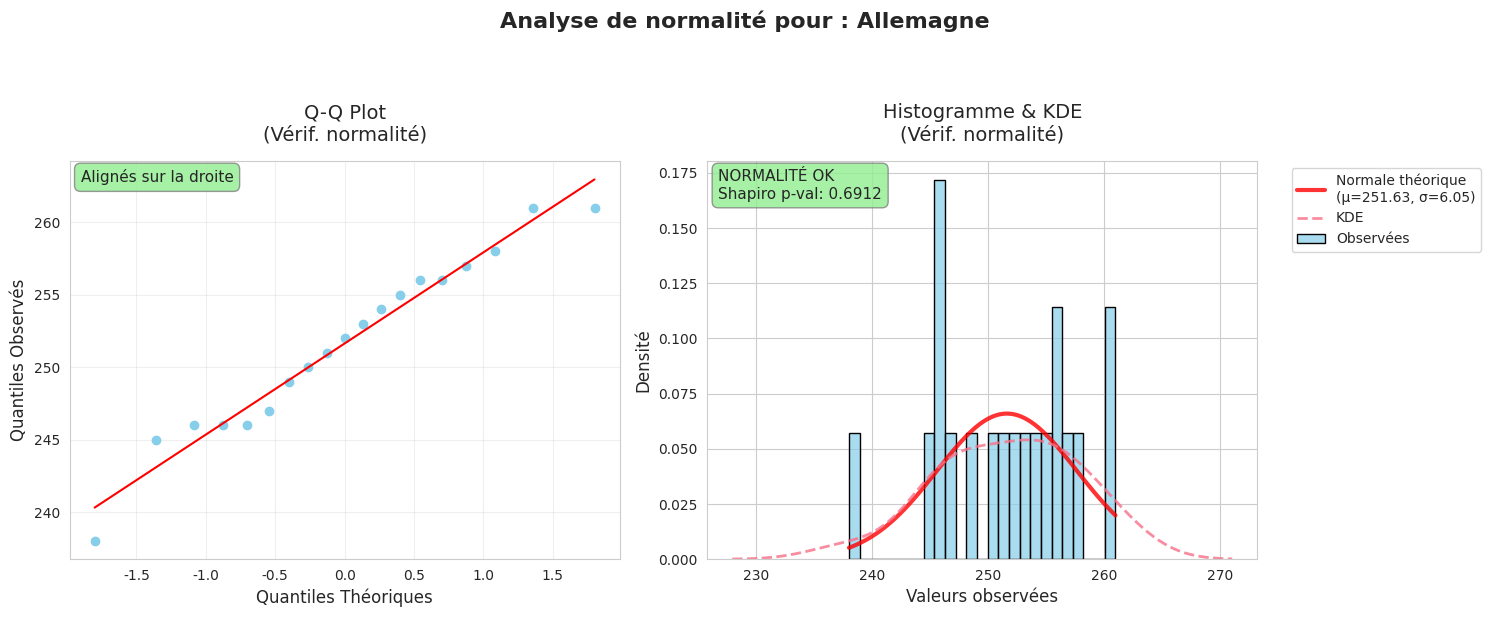

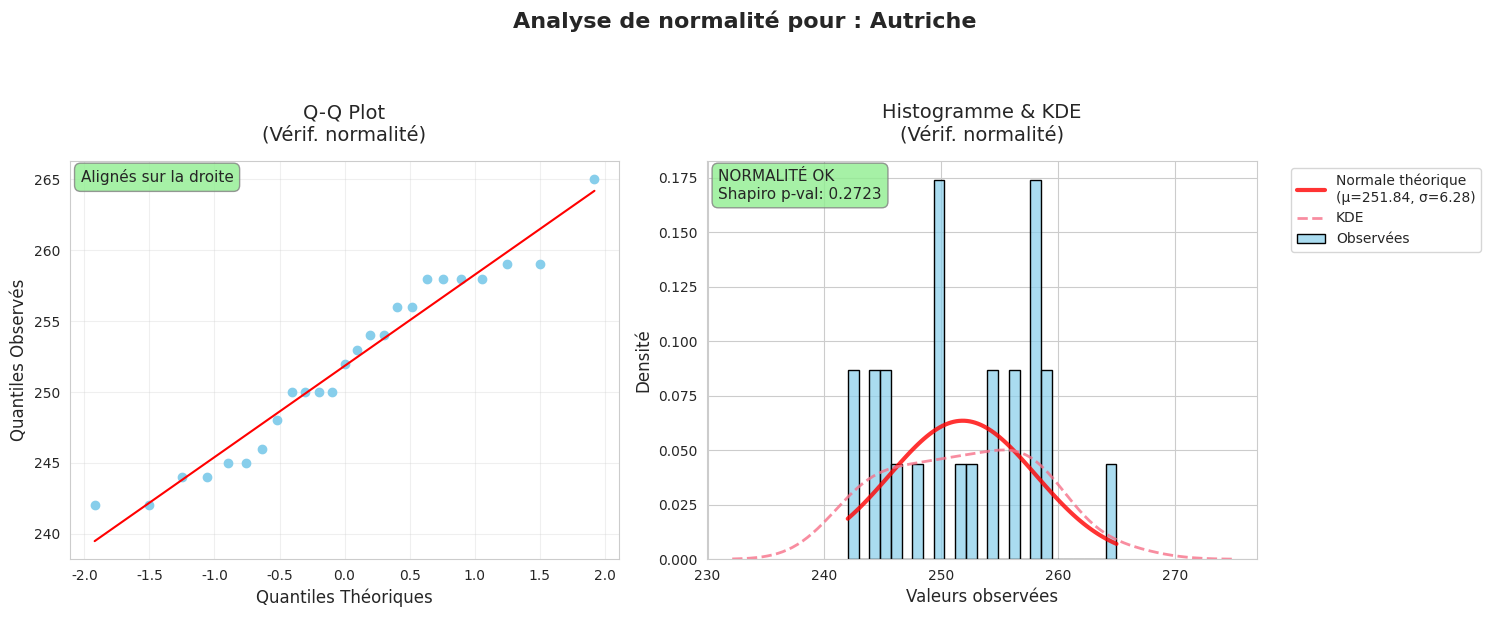

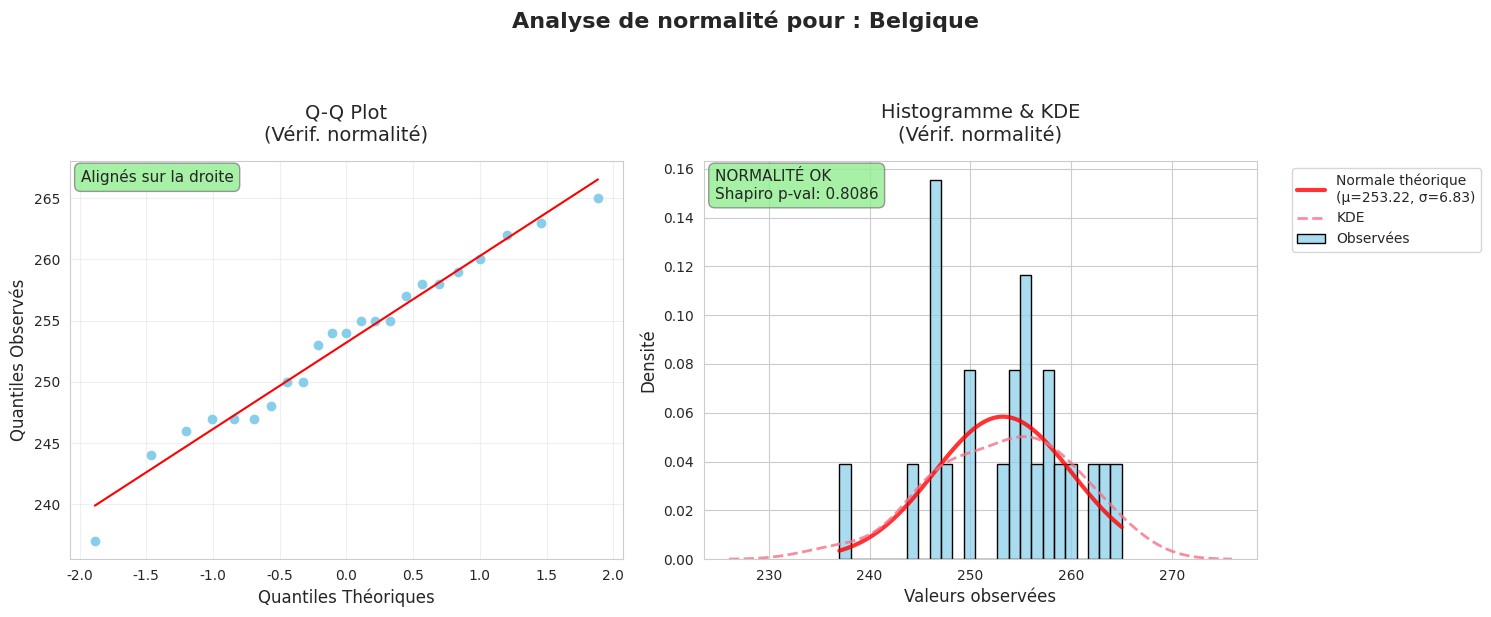

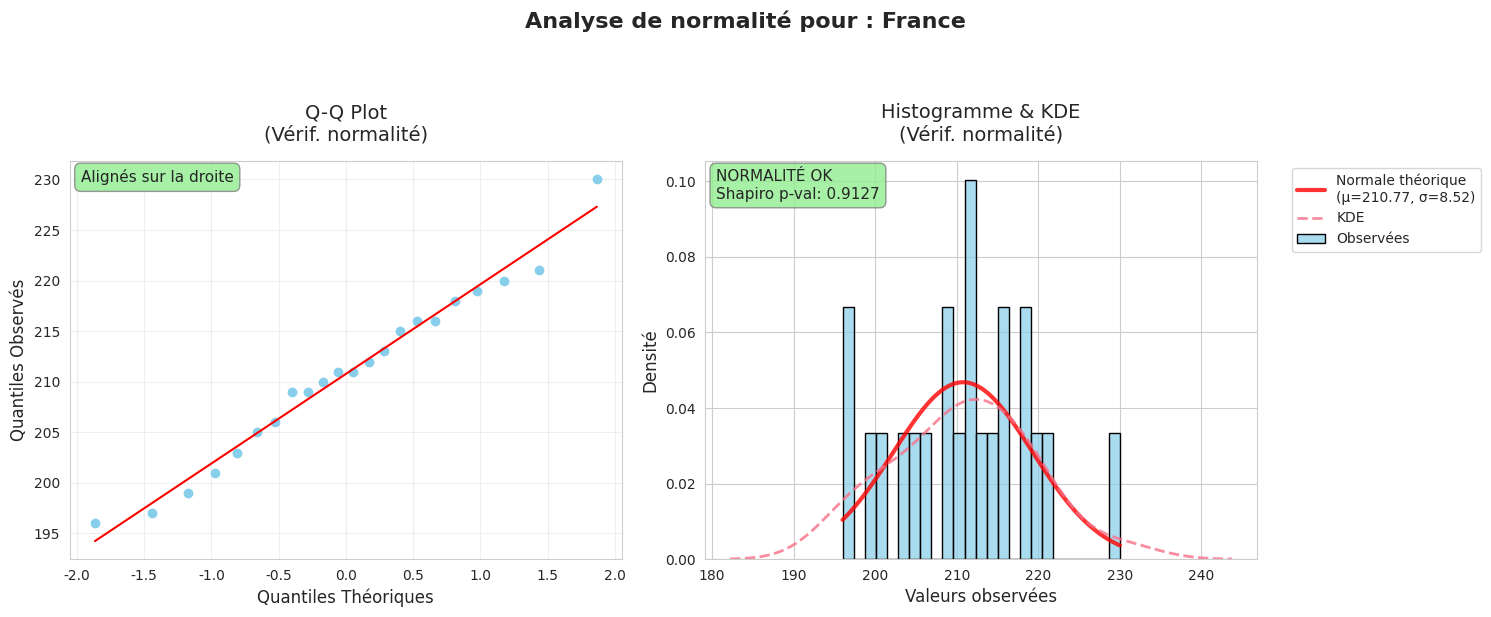

In [5]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import probplot

# Configuration pour les caract√®res Unicode/emojis avec Seaborn
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'Apple Color Emoji']
plt.rcParams['axes.unicode_minus'] = False

# Style Seaborn moderne
sns.set_style("whitegrid")
sns.set_palette("husl")

# Boucle sur chaque pays
for groupe, donnees in df.groupby('pays')['epaisseur']:
    # Structure 1x2 pour deux graphiques c√¥te √† c√¥te
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Titre global pr√©cisant le pays
    fig.suptitle(f'Analyse de normalit√© pour : {groupe}',
                 fontsize=16, fontweight='bold', y=1.02)

    # =============================================================================
    # 1) Q-Q Plot
    # =============================================================================
    probplot(donnees, dist="norm", plot=axes[0])
    # Personnalisation couleurs
    axes[0].get_lines()[0].set_markerfacecolor('skyblue')
    axes[0].get_lines()[0].set_markeredgecolor('skyblue')
    axes[0].get_lines()[1].set_color('red')
    axes[0].set_title('Q-Q Plot\n(V√©rif. normalit√©)', fontsize=14, pad=15)
    axes[0].set_xlabel('Quantiles Th√©oriques', fontsize=12)
    axes[0].set_ylabel('Quantiles Observ√©s', fontsize=12)
    axes[0].grid(True, alpha=0.3)

    # Test de normalit√© (Shapiro-Wilk)
    shapiro_stat, shapiro_pvalue = stats.shapiro(donnees)
    if shapiro_pvalue > 0.05:
        interp_qq, box_color = "Align√©s sur la droite", "lightgreen"
    else:
        interp_qq, box_color = "D√©viations notables", "lightcoral"
    axes[0].text(
        0.02, 0.98, interp_qq,
        transform=axes[0].transAxes, fontsize=11,
        va='top', bbox=dict(boxstyle="round,pad=0.4",
                             facecolor=box_color, alpha=0.8, edgecolor='gray')
    )

    # =============================================================================
    # 2) Distribution + KDE
    # =============================================================================
    sns.histplot(
        donnees, bins=25, stat='density', alpha=0.7,
        color='skyblue', edgecolor='black', ax=axes[1], label='Observ√©es'
    )
    mu, sigma = donnees.mean(), donnees.std()
    x_norm = np.linspace(donnees.min(), donnees.max(), 100)
    y_norm = stats.norm.pdf(x_norm, mu, sigma)
    axes[1].plot(
        x_norm, y_norm, color='red', linewidth=3,
        label=f'Normale th√©orique\n(Œº={mu:.2f}, œÉ={sigma:.2f})', alpha=0.8
    )
    sns.kdeplot(
        donnees, ax=axes[1], linewidth=2, alpha=0.8,
        label='KDE', linestyle='--'
    )
    axes[1].set_title('Histogramme & KDE\n(V√©rif. normalit√©)', fontsize=14, pad=15)
    axes[1].set_xlabel('Valeurs observ√©es', fontsize=12)
    axes[1].set_ylabel('Densit√©', fontsize=12)
    axes[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

    if shapiro_pvalue > 0.05:
        interp_dist, box_color2 = "NORMALIT√â OK", "lightgreen"
    else:
        interp_dist, box_color2 = "NON-NORMALIT√â", "lightcoral"
    axes[1].text(
        0.02, 0.98,
        f"{interp_dist}\nShapiro p-val: {shapiro_pvalue:.4f}",
        transform=axes[1].transAxes, fontsize=11,
        va='top', bbox=dict(boxstyle="round,pad=0.4",
                             facecolor=box_color2, alpha=0.8, edgecolor='gray')
    )

    # Mise en page finale
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# **Test de Bartlett**

Le test de Bartlett est un test statistique utilis√© pour v√©rifier l'homogeneit√© des variances de plus de deux √©chantillons.

**Les hypoth√®ses test sont:**

- $H_0$: Il n'y a pas de diff√©rence significative entre les
variances des √©paisseurs des timbres des diff√©rents pays.

- $H_1$ : Il y a au moins une variance des timbres
diff√©rente des autres variances des √©paisseurs des timbres des diff√©rents pays.

In [6]:
from scipy import stats
groupes = [pays['epaisseur'].values for nom, pays in df.groupby('pays')]


groupes = [np.asarray(g) for g in groupes]

# Ex√©cution du test de Bartlett
stat, p_value = stats.bartlett(*groupes)
print(f"Statistique de Bartlett = {stat:.4f}, p-valeur = {p_value:.4f}")

Statistique de Bartlett = 5.4112, p-valeur = 0.1440


La p-valeurs=0.3838 sup√©rieures √† 0,05. Nous acceptons donc $H_0$ et concluons que les trois √©chantillons ont une m√™me  variabilit√© (variances √©gales).

# ***R√©sultats du test ANOVA:***

In [14]:
import pandas as pd
import pingouin as pg


# ANOVA √† un facteur
anova = pg.anova(dv='epaisseur', between='pays', data=df, detailed=True)

# Affichage des r√©sultats
anova

Source            SS  DF           MS           F         p-unc       np2
0    pays  28530.442268   3  9510.147423  194.619308  5.824759e-38  0.872918
1  Within   4153.557732  85    48.865385         NaN           NaN       NaN

# **üß™ Interpr√©tation des r√©sultats de l‚ÄôANOVA**
La valeur de la statistique F est de 194.62, avec 3 degr√©s de libert√© pour le facteur "pays" et 85 degr√©s de libert√© pour l‚Äôerreur (r√©sidu).
La p-valeur est extr√™mement faible (5.82 √ó 10‚Åª¬≥‚Å∏), bien inf√©rieure au seuil de 0.05, ce qui indique une diff√©rence hautement significative entre les groupes.

# **üîç Conclusion :**
Nous rejetons l‚Äôhypoth√®se nulle H‚ÇÄ, et nous concluons qu‚Äôau moins une moyenne d‚Äô√©paisseur de timbres diff√®re significativement des autres selon le pays.

# **üìä Analyse compl√©mentaire**
np¬≤ (eta carr√© partiel) = 0.873
‚Üí Cela signifie que 87.3 % de la variance totale de l‚Äô√©paisseur des timbres est expliqu√©e par le facteur "pays".
‚Üí C‚Äôest une tr√®s grande taille d‚Äôeffet, ce qui montre que le pays a une influence majeure sur l‚Äô√©paisseur des timbres.
# **üîÅ Tests post-hoc recommand√©s**
Puisque l‚ÄôANOVA indique une diff√©rence globale significative, il est pertinent de r√©aliser des tests post-hoc pour identifier quels pays diff√®rent entre eux

# **Test de comparaison multiples**

Les tests de comparaisons multiples avec la correction de Tukey est une m√©thode d'analyse statistique permettant de comparer tous les groupes entre eux de mani√®re simultan√©e. Cette m√©thode est utilis√©e lorsque nous avons plus de deux groupes √† comparer et que nous souhaitons d√©terminer les diff√©rences significatives entre ces groupes.

In [16]:
import pandas as pd
import pingouin as pg

tukey_results = pg.pairwise_tukey(data=df, dv='epaisseur', between='pays')

tukey_results

A         B     mean(A)     mean(B)       diff        se  \
0  Allemagne  Autriche  251.631579  251.840000  -0.208421  2.127552   
1  Allemagne  Belgique  251.631579  253.217391  -1.585812  2.167128   
2  Allemagne    France  251.631579  210.772727  40.858852  2.189296   
3   Autriche  Belgique  251.840000  253.217391  -1.377391  2.019702   
4   Autriche    France  251.840000  210.772727  41.067273  2.043470   
5   Belgique    France  253.217391  210.772727  42.444664  2.084643   

           T       p-tukey    hedges  
0  -0.097963  9.996606e-01 -0.033122  
1  -0.731758  8.840742e-01 -0.239770  
2  18.663011  1.876277e-14  5.356420  
3  -0.681977  9.036831e-01 -0.206959  
4  20.096833  1.876277e-14  5.451067  
5  20.360641  1.876277e-14  5.415261

# **üß™ Objectif du test de Tukey**
Le test de Tukey permet de comparer chaque paire de pays pour d√©terminer quelles diff√©rences d‚Äô√©paisseur de timbres sont statistiquement significatives apr√®s une ANOVA.

# **üìä Interpr√©tation des r√©sultats**

# ‚úÖ Comparaisons significatives :
Les paires suivantes montrent des diff√©rences significatives (p-value tr√®s faible) :

- Allemagne vs France

Diff√©rence moyenne : +40.86 unit√©s
p-value : 1.88 √ó 10‚Åª¬π‚Å¥
Taille d‚Äôeffet (Hedges‚Äô g) : 5.36 ‚Üí tr√®s grande diff√©rence
- Autriche vs France

Diff√©rence moyenne : +41.07 unit√©s
p-value : 1.88 √ó 10‚Åª¬π‚Å¥
Taille d‚Äôeffet : 5.45 ‚Üí tr√®s grande diff√©rence
- Belgique vs France

Diff√©rence moyenne : +42.44 unit√©s
p-value : 1.88 √ó 10‚Åª¬π‚Å¥
Taille d‚Äôeffet : 5.42 ‚Üí tr√®s grande diff√©rence
üëâ Ces r√©sultats indiquent que la France se distingue nettement des trois autres pays en termes d‚Äô√©paisseur de timbres.

# ‚ùå Comparaisons non significatives :
Les paires suivantes ne montrent pas de diff√©rence significative :

- Allemagne vs Autriche

Diff√©rence : -0.21 unit√©s
p-value : 0.9997
Taille d‚Äôeffet : -0.03 ‚Üí n√©gligeable
- Allemagne vs Belgique

Diff√©rence : -1.59 unit√©s
p-value : 0.884
Taille d‚Äôeffet : -0.24 ‚Üí faible
- Autriche vs Belgique

Diff√©rence : -1.38 unit√©s
p-value : 0.904
Taille d‚Äôeffet : -0.21 ‚Üí faible

üëâ Ces r√©sultats montrent que l‚ÄôAllemagne, l‚ÄôAutriche et la Belgique ont des √©paisseurs de timbres similaires.

# üß† Conclusion finale
Le test post-hoc de Tukey r√©v√®le que la France pr√©sente une √©paisseur de timbres significativement plus faible que les autres pays (Allemagne, Autriche, Belgique), avec des diff√©rences tr√®s marqu√©es et hautement significatives.
En revanche, aucune diff√©rence significative n‚Äôest observ√©e entre l‚ÄôAllemagne, l‚ÄôAutriche et la Belgique, qui forment un groupe homog√®ne.